# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/camille_Crise_economique/"

## Choisir une décennie

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [4]:
files = [f for f in sorted(os.listdir(data_path))]

In [5]:
# Exemple de fichiers
files[:5]

['KB_JB838_1929-06-01_01-00001.txt',
 'KB_JB838_1930-01-10_01-00001.txt',
 'KB_JB838_1930-02-26_01-00002.txt',
 'KB_JB838_1930-03-01_01-00003.txt',
 'KB_JB838_1930-04-06_01-00001.txt']

In [6]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [7]:
# Exemple de textes
texts[0][:400]

'a*’ CW\'- tm p ^ •‘•" \' ; “•■ ’• ! ‘ . \'-■)#? ’ *>. •/\' •\' \' : ‘ \'•‘‘‘■■\'.H ; 5j ;■\'* y i(\' \' ,v ‘ •: : \' \'- ’ ■ \' •’■”•\' \'"’’ ■- ■ • ^^■1 " ;“ *\' » s.iïiFW V . ,tf \'^ -1 —’ \'—" •■ \'• ■. C-"r^»yWWïiS”. ■ - \'rfytjfRtfiyprfç!Kur7*vn?, 16 PAGES - 30 C mes }? ■ \\ <En Belgique et Allemagne occupée) jA l l’Etranger t 3S Centimes •/M JUIN 1929; Edit. **** * * * * à 14 b. 1* 4 Editions : ‘îï Mït ” * Edit, '

## Vectoriser les documents à l'aide de TF-IDF

In [8]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [9]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [10]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [11]:
# Détail de la matrice
tfidf_vectors

<500x4155 sparse matrix of type '<class 'numpy.float64'>'
	with 437921 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [12]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

agricole        0.141291
conservateur    0.139459
voiture         0.132114
moitié          0.131685
jaspar          0.128365
                  ...   
exactement      0.000000
examine         0.000000
examiner        0.000000
examiné         0.000000
♦               0.000000
Length: 4155, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [13]:
cosine([1, 2, 3], [1, 2, 3])

0

In [14]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [15]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [16]:
tfidf_array = tfidf_vectors.toarray()

In [17]:
# Vecteur du document 0
tfidf_array[0]

array([0.0428489 , 0.        , 0.05948402, ..., 0.06454798, 0.05962767,
       0.        ])

In [18]:
# Vecteur du document 1
tfidf_array[1]

array([0.01932245, 0.        , 0.        , ..., 0.05821505, 0.05377748,
       0.        ])

In [19]:
cosine(tfidf_array[0], tfidf_array[1])

0.8283534575562744

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [20]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [22]:
clusters = km_model.fit_predict(tfidf_vectors)

In [23]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [24]:
pprint(dict(clustering))

{0: ['KB_JB838_1930-03-01_01-00003.txt',
     'KB_JB838_1930-09-09_01-00003.txt',
     'KB_JB838_1930-09-14_01-00003.txt',
     'KB_JB838_1930-09-24_01-00003.txt',
     'KB_JB838_1930-11-05_01-00003.txt',
     'KB_JB838_1930-11-21_01-00003.txt',
     'KB_JB838_1930-11-28_01-00003.txt',
     'KB_JB838_1931-01-16_01-00003.txt',
     'KB_JB838_1931-01-22_01-00003.txt',
     'KB_JB838_1931-03-31_01-00003.txt',
     'KB_JB838_1931-05-17_01-00003.txt',
     'KB_JB838_1931-05-23_01-00003.txt',
     'KB_JB838_1931-05-28_01-00003.txt',
     'KB_JB838_1931-05-29_01-00003.txt',
     'KB_JB838_1931-06-06_01-00003.txt',
     'KB_JB838_1931-07-13_01-00005.txt',
     'KB_JB838_1931-07-17_01-00003.txt',
     'KB_JB838_1931-08-22_01-00003.txt',
     'KB_JB838_1931-09-18_01-00003.txt',
     'KB_JB838_1931-09-19_01-00003.txt',
     'KB_JB838_1931-10-07_01-00003.txt',
     'KB_JB838_1931-10-27_01-00003.txt',
     'KB_JB838_1931-11-08_01-00003.txt',
     'KB_JB838_1931-11-11_01-00003.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [25]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [26]:
reduced_vectors[:10]

array([[-0.10876849, -0.10979063],
       [-0.14703694, -0.11769352],
       [-0.00355828,  0.14992151],
       [ 0.26973337, -0.05851598],
       [-0.11203338, -0.16741465],
       [-0.11065774, -0.14180866],
       [-0.12050011, -0.15832342],
       [ 0.48010823, -0.19560336],
       [ 0.48483955, -0.17514176],
       [ 0.00988679,  0.00059063]])

### Générer le plot

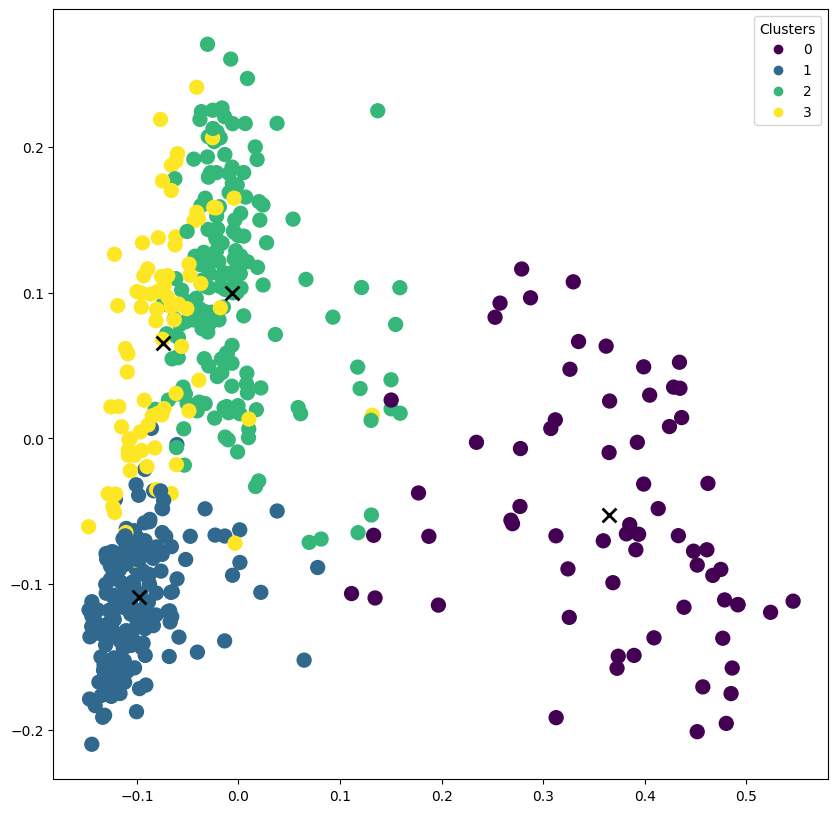

In [27]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")